In [1]:
!git clone 'https://github.com/aakashvardhan/s8-normalization.git'

fatal: destination path 's8-normalization' already exists and is not an empty directory.


In [2]:
import sys
sys.path.append('/content/s8-normalization')

In [3]:
from config import get_config
config = get_config()
import torch
from utils import setup_cifar10_data
import matplotlib.pyplot as plt
import numpy as np
import torchvision

In [4]:
train_data,test_data,train_loader, test_loader = setup_cifar10_data(config)

CUDA Available? False
Files already downloaded and verified
Files already downloaded and verified


In [5]:
classes = train_data.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

### Iterate & Plot images in batch, along with corresponding labels

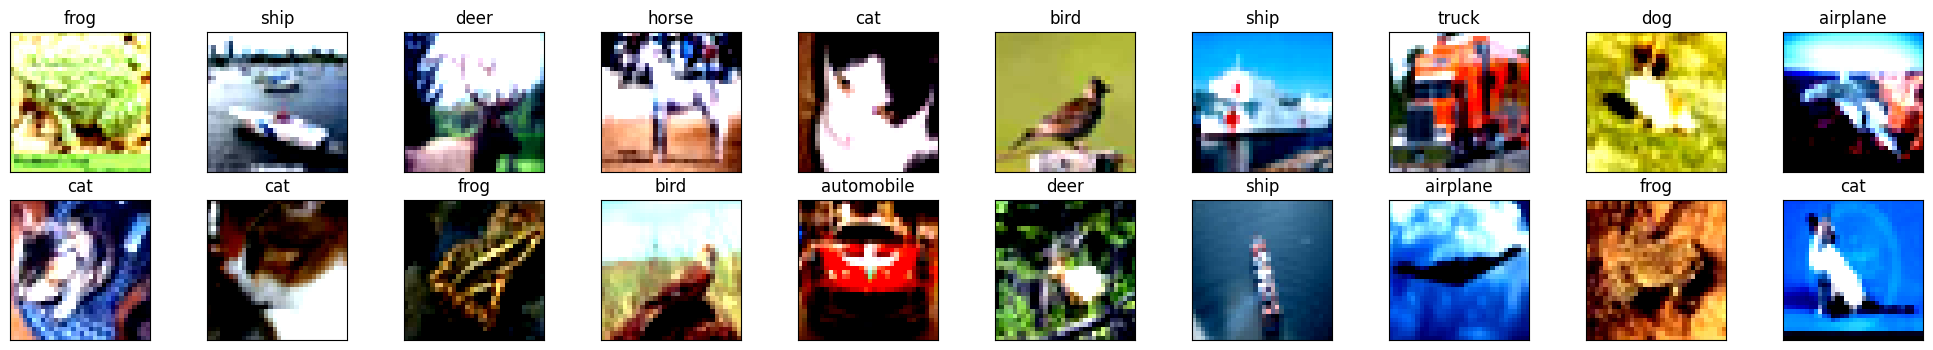

In [13]:
%matplotlib inline
# Helper Function
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Plot images in batch, with corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

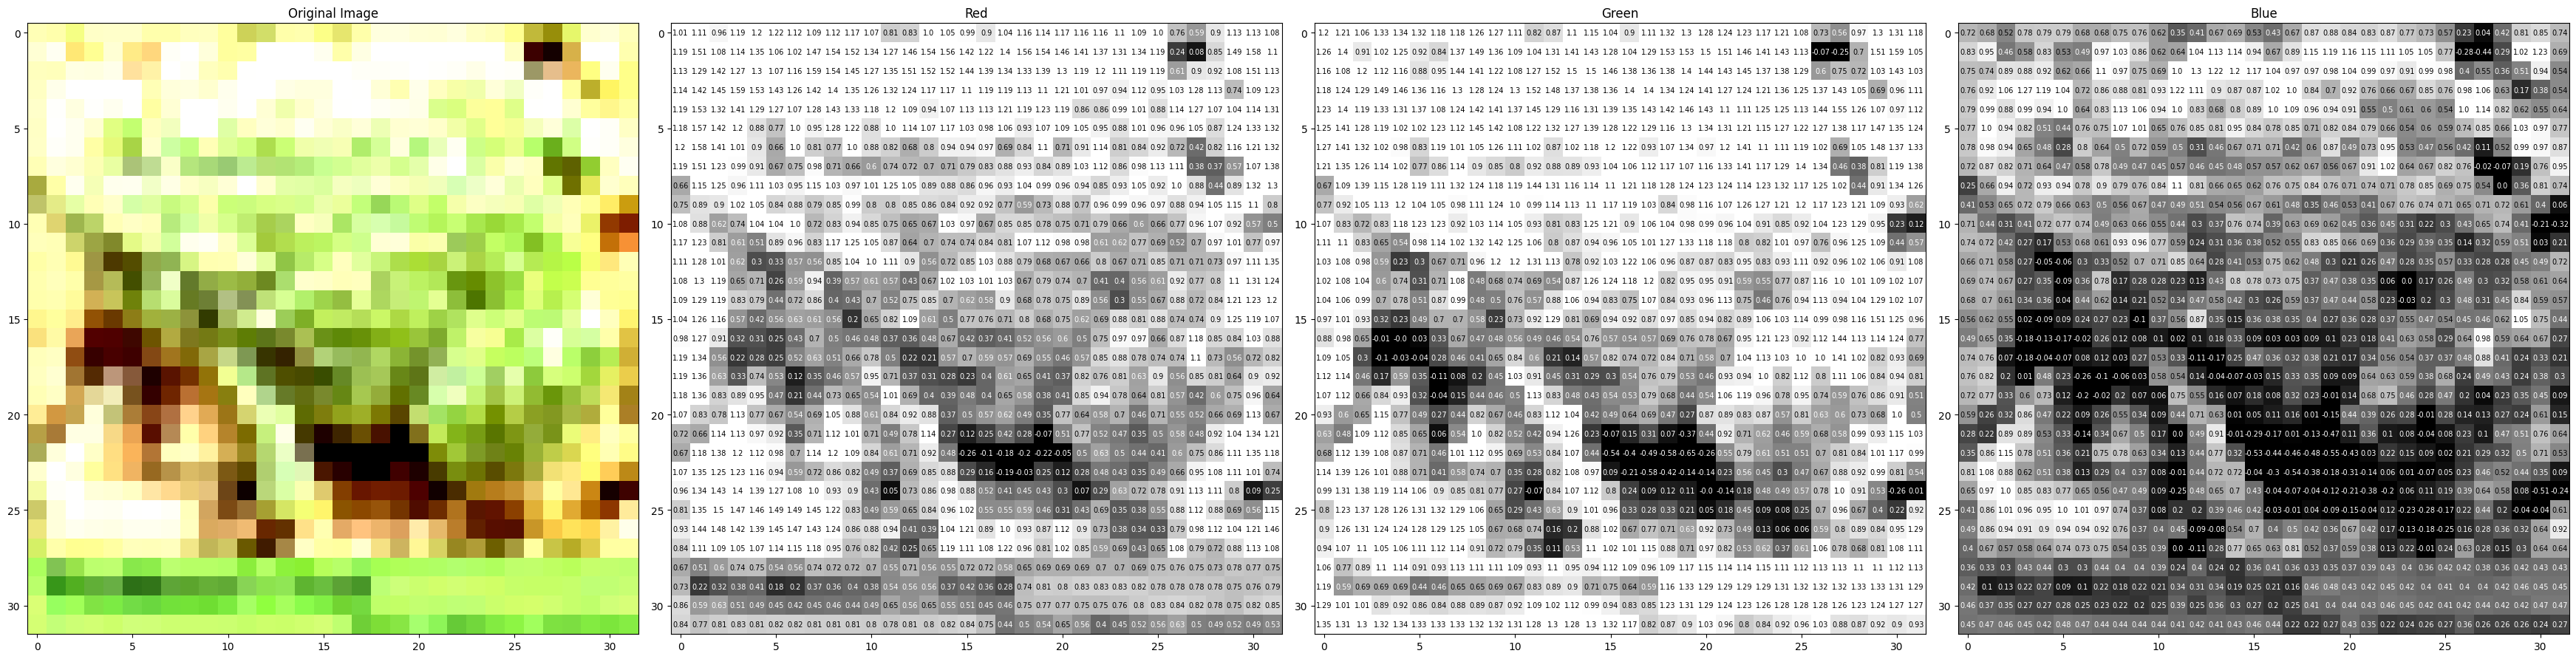

In [14]:
%matplotlib inline

images = images.numpy()
original_img = np.squeeze(images[0])
image_class = classes[labels[0]]

normalized_img = (original_img.transpose(1, 2, 0) + 1) / 2  # Normalize image to [0, 1] range

rgb_img = np.transpose(normalized_img, (0, 1, 2))
channels = ['Red', 'Green', 'Blue']
fig, axs = plt.subplots(1, 4, figsize=(35, 15))  # Adjust figure size as needed

# Display the original image
axs[0].imshow(rgb_img)
axs[0].set_title('Original Image')

# Function to display a single channel
def display_channel(ax, img, title, cmap, vmin=0, vmax=1):
    ax.imshow(img, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.set_title(title)
    width, height = img.shape
    thresh = img.max() / 2.5
    for x in range(width):
        for y in range(height):
            val = round(img[x, y], 2) if img[x, y] != 0 else 0
            ax.annotate(str(val), xy=(y, x), horizontalalignment='center', verticalalignment='center', size=7,
                        color='white' if img[x, y] < thresh else 'black')

# Iterate over the RGB channels
for idx in range(3):
    channel_img = rgb_img[:, :, idx]
    display_channel(axs[idx + 1], channel_img, channels[idx], 'gray')

plt.tight_layout()
plt.show()